In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:, 2:]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
271,59,76000,1
116,35,75000,0
149,20,74000,0
122,40,75000,0
106,26,35000,0


Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [9]:
x_train.shape, x_test.shape

((280, 2), (120, 2))

Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [15]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [16]:
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [18]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


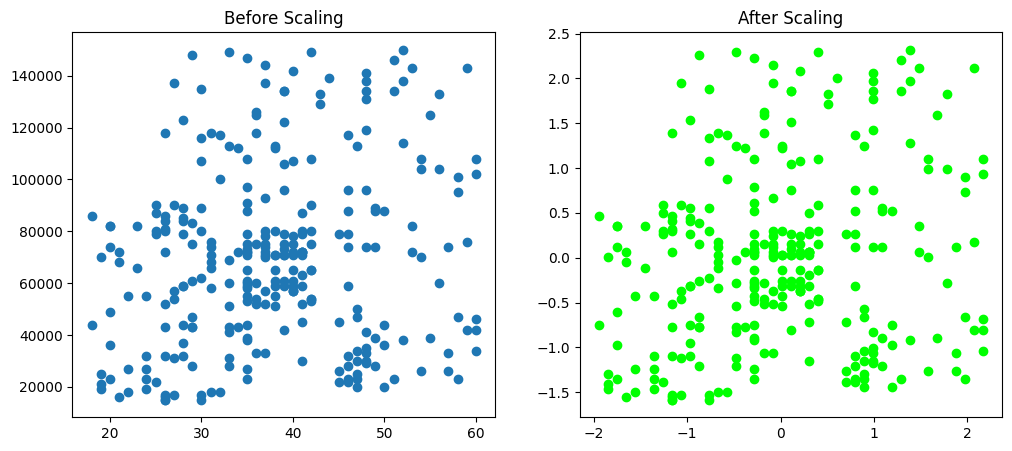

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='lime')
ax2.set_title("After Scaling")

plt.show()

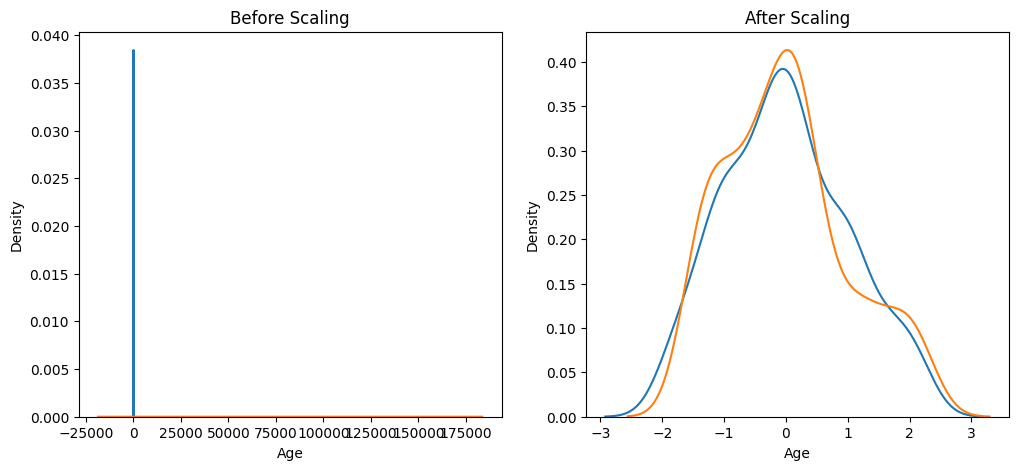

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)


ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

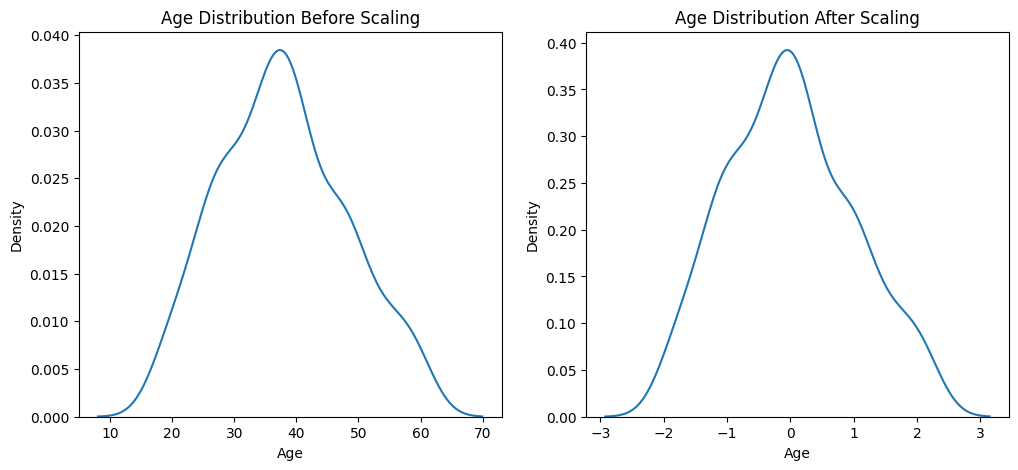

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

plt.show()

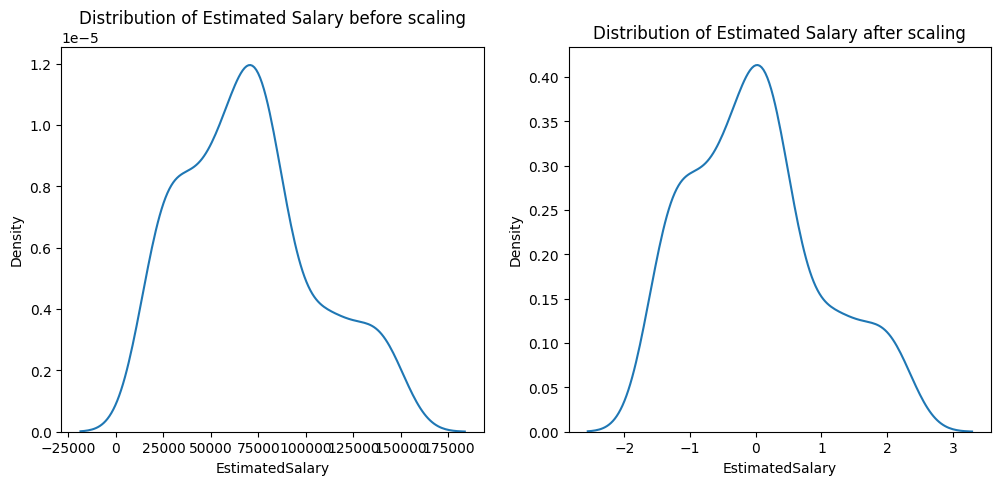

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Distribution of Estimated Salary before scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Distribution of Estimated Salary after scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

Importance of Scaling

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [26]:
pred = lr.predict(x_test)
pred_scaled = lr_scaled.predict(x_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test, pred))
print('Scaled Accuracy', accuracy_score(y_test, pred_scaled))


Accuracy 0.6583333333333333
Scaled Accuracy 0.8666666666666667


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [29]:
dt_pred = dt.predict(x_test)
dt_pred_scaled = dt_scaled.predict(x_test_scaled)

In [30]:
print('Accuracy : ', accuracy_score(y_test, dt_pred))
print('Scaled Accuracy : ', accuracy_score(y_test, dt_pred_scaled))

Accuracy :  0.875
Scaled Accuracy :  0.875
